# Iphone Resell-value Analysis 
## Importing all dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing scraped data from ebay-terapeak and quick sanity check

In [2]:
raw_data = pd.read_csv('ebay_iphone_prices.csv')
print(raw_data.isnull().sum())

web-scraper-order        0
web-scraper-start-url    0
Listing                  0
Price                    0
Sale_Format              0
Shipping_Cost            0
Shipping_percent         0
Shipping                 0
Total sold               0
Item_Revenue             0
Bids                     0
Date                     0
dtype: int64


In [3]:
print(raw_data.describe().round(2))

          Price  Shipping_Cost  Shipping_percent  Total sold  Item_Revenue
count  81272.00       81272.00          81272.00    81272.00      81272.00
mean     644.26           3.74              0.41        4.90       3784.48
std      358.10           3.91              0.49       49.39      41990.06
min      150.10           0.00              0.00        1.00        150.01
25%      364.63           0.00              0.00        1.00        374.69
50%      573.68           5.51              0.00        1.00        626.21
75%      865.62           5.96              1.00        1.00       1037.38
max     2000.00         430.82              1.00     4923.00    4035679.65


In [4]:
print(raw_data['Date'].value_counts())

Date
11/19/2023    479
11/5/2023     423
11/12/2023    409
12/18/2022    401
12/11/2022    380
             ... 
9/1/2021        1
2/23/2021       1
5/9/2021        1
10/7/2021       1
12/4/2021       1
Name: count, Length: 1053, dtype: int64


In [5]:
print(raw_data['Sale_Format'].value_counts())

Sale_Format
Fixed price    46607
Auction        34665
Name: count, dtype: int64


## Setting up derived columns and doing minor data preparation

In [6]:
raw_data['Model'] = raw_data['web-scraper-start-url'].str.extract(r'aspect=Modell%3A%3A%3A([^&]+)')
raw_data['Model'] = raw_data['Model'].str.replace('+', ' ')

In [7]:
raw_data['Storage'] = raw_data['web-scraper-start-url'].str.extract(r'aspect=Speicherkapazit%C3%A4t%3A%3A%3A([^&]+)')
raw_data['Storage'] = raw_data['Storage'].str.replace('+', ' ')

In [12]:
release_dates = {
    'Apple iPhone 11 Pro Max': '20.09.2019',
    'Apple iPhone 11 Pro': '20.09.2019',
    'Apple iPhone XS': '26.10.2018',
    'Apple iPhone XR': '26.10.2018',
    'Apple iPhone 11': '20.09.2019',
    'Apple iPhone X': '03.11.2017',
    'Apple iPhone 12': '23.10.2020',
    'Apple iPhone 12 Pro': '23.10.2020',
    'Apple iPhone 12 Pro Max': '23.10.2020',
    'Apple iPhone 12 mini': '23.10.2020',
    'Apple iPhone 13 mini': '24.09.2021',
    'Apple iPhone 13 Pro': '24.09.2021',
    'Apple iPhone 13 Pro Max': '24.09.2021',
    'Apple iPhone 13': '24.09.2021',
    'Apple iPhone 14 Pro': '16.09.2022',
    'Apple iPhone 14 Pro Max': '16.09.2022',
    'Apple iPhone 14': '16.09.2022'
}
raw_data['Release_date'] = raw_data['Model'].map(release_dates)

In [20]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'], format='%m/%d/%Y')
raw_data['Release_date'] = pd.to_datetime(raw_data['Release_date'], format='%d.%m.%Y')

In [14]:
release_prices = {
    'Apple iPhone 11 Pro Max 64 GB': 1249,
    'Apple iPhone 11 Pro Max 256 GB': 1419,
    'Apple iPhone 11 Pro Max 512 GB': 1649,

    'Apple iPhone 11 Pro 64 GB': 1149,
    'Apple iPhone 11 Pro 256 GB': 1319,
    'Apple iPhone 11 Pro 512 GB': 1549,

    'Apple iPhone XS 64 GB': 1249,
    'Apple iPhone XS 256 GB': 1419,
    'Apple iPhone XS 512 GB': 1549,

    'Apple iPhone XR 64 GB': 849,
    'Apple iPhone XR 128 GB': 909,
    'Apple iPhone XR 256 GB': 1019,

    'Apple iPhone 11 64 GB': 799,
    'Apple iPhone 11 128 GB': 849,
    'Apple iPhone 11 256 GB': 969,

    'Apple iPhone X 64 GB': 1149,
    'Apple iPhone X 256 GB': 1319,

    'Apple iPhone 12 64 GB': 899,
    'Apple iPhone 12 128 GB': 949,
    'Apple iPhone 12 256 GB': 1069,

    'Apple iPhone 12 Pro 128 GB': 1149,
    'Apple iPhone 12 Pro 256 GB': 1269,
    'Apple iPhone 12 Pro 512 GB': 1499,

    'Apple iPhone 12 Pro Max 128 GB': 1249,
    'Apple iPhone 12 Pro Max 256 GB': 1369,
    'Apple iPhone 12 Pro Max 512 GB': 1599,

    'Apple iPhone 12 mini 64 GB': 799,
    'Apple iPhone 12 mini 128 GB': 849,
    'Apple iPhone 12 mini 256 GB': 969,

    'Apple iPhone 13 mini 128 GB': 799,
    'Apple iPhone 13 mini 256 GB': 919,
    'Apple iPhone 13 mini 512 GB': 1149,

    'Apple iPhone 13 128 GB': 899,
    'Apple iPhone 13 256 GB': 1019,
    'Apple iPhone 13 512 GB': 1249,

    'Apple iPhone 13 Pro 128 GB': 1149,
    'Apple iPhone 13 Pro 256 GB': 1269,
    'Apple iPhone 13 Pro 512 GB': 1499,
    'Apple iPhone 13 Pro 1 TB': 1729,

    'Apple iPhone 13 Pro Max 128 GB': 1249,
    'Apple iPhone 13 Pro Max 256 GB': 1369,
    'Apple iPhone 13 Pro Max 512 GB': 1599,
    'Apple iPhone 13 Pro Max 1 TB': 1829,

    'Apple iPhone 14 128 GB': 999,
    'Apple iPhone 14 256 GB': 1129,
    'Apple iPhone 14 512 GB': 1389,

    'Apple iPhone 14 Pro 128 GB': 1299,
    'Apple iPhone 14 Pro 256 GB': 1429,
    'Apple iPhone 14 Pro 512 GB': 1689,
    'Apple iPhone 14 Pro 1 TB': 1949,

    'Apple iPhone 14 Pro Max 128 GB': 1449,
    'Apple iPhone 14 Pro Max 256 GB': 1579,
    'Apple iPhone 14 Pro Max 512 GB': 1839,
    'Apple iPhone 14 Pro Max 1 TB': 2099
}
raw_data['Combined'] = raw_data['Model'] + " " + raw_data['Storage']
raw_data['release_price'] = raw_data['Combined'].map(release_prices)

In [15]:
raw_data['Storage'].replace('1 TB', '1024 GB', inplace=True)
raw_data['Storage'] = raw_data['Storage'].str.replace(' GB', '', regex=False).astype('int64')

In [16]:
raw_data['Bids'].replace('–', 0, inplace=True)

In [17]:
raw_data['Price_incl_shipping'] = raw_data['Price'] + raw_data['Shipping_Cost']

In [21]:
raw_data['days_since_release'] = (raw_data['Date'] - raw_data['Release_date']).dt.days

## Data exploration and minor analysis

In [22]:
data = raw_data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81272 entries, 0 to 81271
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   web-scraper-order      81272 non-null  object        
 1   web-scraper-start-url  81272 non-null  object        
 2   Listing                81272 non-null  object        
 3   Price                  81272 non-null  float64       
 4   Sale_Format            81272 non-null  object        
 5   Shipping_Cost          81272 non-null  float64       
 6   Shipping_percent       81272 non-null  float64       
 7   Shipping               81272 non-null  object        
 8   Total sold             81272 non-null  int64         
 9   Item_Revenue           81272 non-null  float64       
 10  Bids                   81272 non-null  object        
 11  Date                   81272 non-null  datetime64[ns]
 12  Model                  81272 non-null  object        
 13  S

In [27]:
print(raw_data['Date'].value_counts())

Date
2023-11-19    479
2023-11-05    423
2023-11-12    409
2022-12-18    401
2022-12-11    380
             ... 
2021-09-01      1
2021-02-23      1
2021-05-09      1
2021-10-07      1
2021-12-04      1
Name: count, Length: 1053, dtype: int64


In [28]:
print(raw_data['Model'].value_counts())

Model
Apple iPhone 12            9102
Apple iPhone 12 Pro        6605
Apple iPhone 14 Pro Max    6218
Apple iPhone 14 Pro        5895
Apple iPhone 12 mini       5859
Apple iPhone 13 Pro        5573
Apple iPhone 11 Pro        5516
Apple iPhone XR            5039
Apple iPhone 14            4947
Apple iPhone 13 Pro Max    4752
Apple iPhone 13            4142
Apple iPhone XS            3897
Apple iPhone 12 Pro Max    3875
Apple iPhone 11 Pro Max    3487
Apple iPhone 11            2299
Apple iPhone X             2146
Apple iPhone 13 mini       1920
Name: count, dtype: int64


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Shipping_Cost'}>,
        <Axes: title={'center': 'Shipping_percent'}>],
       [<Axes: title={'center': 'Total sold'}>,
        <Axes: title={'center': 'Item_Revenue'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Storage'}>,
        <Axes: title={'center': 'Release_date'}>,
        <Axes: title={'center': 'release_price'}>],
       [<Axes: title={'center': 'Price_incl_shipping'}>,
        <Axes: title={'center': 'days_since_release'}>, <Axes: >]],
      dtype=object)

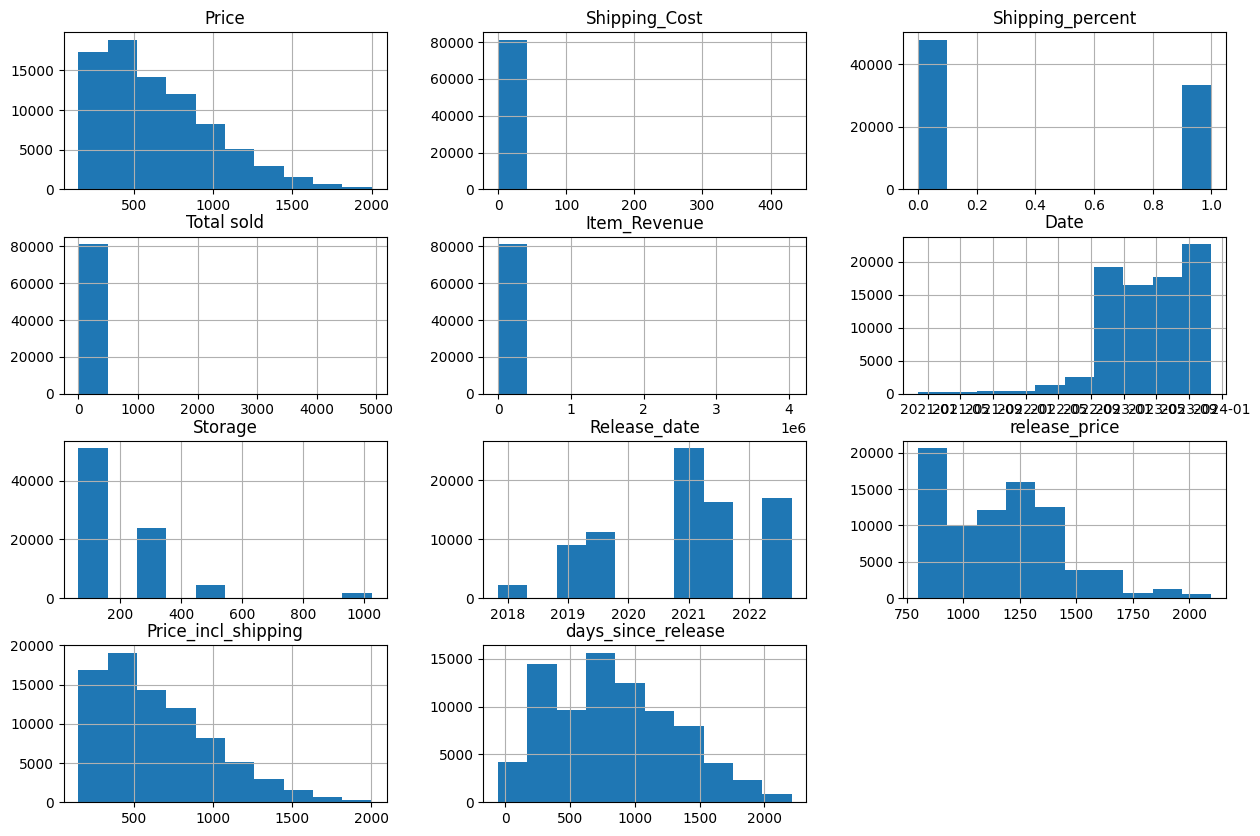

In [24]:
data.hist(figsize=(15, 10))

## ready to train some models? :)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop(['Price'], axis= 1)
y = data['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_s, y_train)

In [ ]:
reg.score(X_test_s, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor()

forest1.fit(X_train_s, y_train)

In [ ]:
forest1.score(X_test_s, y_test)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# forest2 = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [300, 500, 1000],
#     'max_features': [6],
#     'min_samples_split': [8, 10, 20]
# }

# grid_search = GridSearchCV(forest2, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# grid_search.fit(X_train_s, y_train)

In [ ]:
# best_forest = grid_search.best_estimator_
# best_forest

In [ ]:
# best_forest.score(X_test_s, y_test)

In [ ]:
predictions = forest1.predict(X=X_test_s)

In [ ]:
columns_pred = [
    'Storage',
    'release_price',
    'Days_since_release',
    'price_class',
    'Condition_defekt',
    'Condition_gebraucht',
    'Condition_gut refurbished',
    'Condition_hervorragend refurbished',
    'Condition_neu',
    'Condition_neu sonstige',
    'Condition_zertifiziert refurbished'
]
predframe = pd.DataFrame(columns=columns_pred)
# defekt, gebraucht, gut refurbished, hervorragend refurbished, neu, neu sonstige, zertifiziert refurbished
predframe.loc[0] = [256, 1269, 800, 2, True, False, False, False, False, False, False]
predframe.loc[1] = [256, 1269, 800, 2, False, True, False, False, False, False, False]
predframe.loc[2] = [256, 1269, 800, 2, False, False, True, False, False, False, False]
predframe.loc[3] = [256, 1269, 800, 2, False, False, False, True, False, False, False]
predframe.loc[4] = [256, 1269, 800, 2, False, False, False, False, True, False, False]
predframe.loc[5] = [256, 1269, 800, 2, False, False, False, False, False, True, False]
predframe.loc[6] = [256, 1269, 800, 2, False, False, False, False, False, False, True]
predframe_s = scaler.transform(predframe)

In [ ]:
forest1.predict(X=predframe_s)